<a href="https://colab.research.google.com/github/ZahraEk/Speech/blob/main/EX2_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MFCCs : [[-359.67752    -361.4502     -369.0234     ... -373.36636
  -351.6187     -329.8145    ]
 [  82.37858      96.87184     102.18004    ...  105.57614
    87.58997      70.00835   ]
 [  31.45324      19.261736     13.898779   ...   13.247271
    35.110035     53.88546   ]
 ...
 [   5.9108295     0.9415394    -4.7406397  ...   -4.50327
    -2.1022093     3.1417801 ]
 [   5.6941442     1.5240294    -1.997078   ...   -1.2622166
    -2.320697      0.65798295]
 [  -2.2594047    -1.3863492     0.5693344  ...    1.081316
     3.7647789     8.317696  ]]
MFCCs htk : [[-3.46296051e+02 -3.60951019e+02 -3.60432037e+02 -3.61206268e+02
  -3.62244019e+02 -3.03551361e+02 -3.35741608e+02 -2.25529205e+02
  -1.61462265e+02 -1.30364380e+02 -1.29979706e+02 -1.43105850e+02
  -1.62043961e+02 -2.46093872e+02 -3.35657745e+02 -2.63206848e+02
  -2.43330399e+02 -3.06517334e+02 -3.57688232e+02 -3.58800507e+02
  -3.65390167e+02 -3.40092255e+02]
 [ 1.05754196e+02  1.18439667e+02  1.20925156e+02  1.20915085e+02

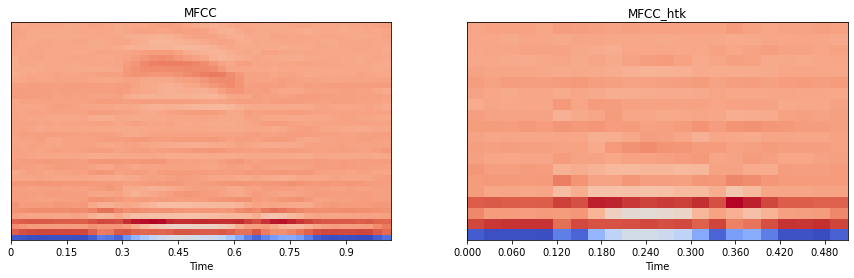

In [59]:
import librosa
import librosa.display
import os
import cv2
import numpy as np
import matplotlib.style as ms
import matplotlib.pyplot as plt
ms.use('seaborn-muted')

#extract mfccs
audio_path = "data/test/te_f_01_01.wav"
x, sr = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40)
mfccs_htk = librosa.feature.mfcc(y=x, sr=sr, hop_length=1024, htk=True)


#print & display
print("MFCCs :", mfccs)
print("MFCCs htk :", mfccs_htk)

print("Number of windows mfccs :",mfccs.shape[0])
print("Number of windows mfccs_htk :",mfccs_htk.shape[0])

print("Length of each feature mfccs :",mfccs.shape[1])
print("Length of each feature mfccs_htk :", mfccs_htk.shape[1])

fig, ax = plt.subplots(ncols=2, figsize=(15,4))
librosa.display.specshow(mfccs, x_axis="time", ax=ax[0])
librosa.display.specshow(mfccs_htk, x_axis="time", ax=ax[1])
ax[0].set_title("MFCC")
ax[1].set_title("MFCC_htk")
plt.show()

#Save MFCCs figure & text
with open('MFCCs_text/mfccs.txt', 'w') as f:
    f.write("MFCCS : \n")
    f.write(str(mfccs))
    f.write("\n MFCCS_htk : \n")
    f.write(str(mfccs_htk))
    f.write("\n Number of windows mfccs :")
    f.write(str(mfccs.shape[0]))
    f.write("\n Number of windows mfccs_htk :")
    f.write(str(mfccs_htk.shape[0]))
    f.write("\n Length of each feature mfccs :")
    f.write(str(mfccs.shape[1]))
    f.write("\n Length of each feature mfccs_htk :")
    f.write(str(mfccs_htk.shape[1]))

fig.savefig('MFCCs/mfccs_.png')



Text(0.5, 1.0, 'LP Model Forward Prediction')

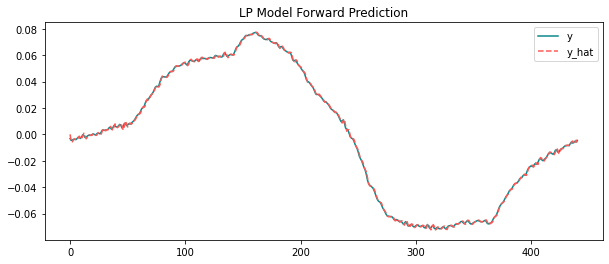

In [ ]:
import matplotlib.pyplot as plt
import scipy

audio_path = "data/train/tr_f_01_02.wav"

#calcute lpc
y, sr = librosa.load(audio_path, duration=0.020)
a = librosa.lpc(y, order=2)
b = np.hstack([[0], -1 * a[1:]])
y_hat = scipy.signal.lfilter(b, [1], y)

#Display lpc
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(y, color="xkcd:dark cyan")
ax.plot(y_hat, linestyle='--', color="xkcd:grapefruit")
ax.legend(['y', 'y_hat'])
ax.set_title('LP Model Forward Prediction')

#save figure
fig.savefig('LPC/lpc_.png')
